## Tarea

Importa las librerías necesarias para resolver los siguientes ejercicios (no necesitaras ninguna que no hayamos utilizado nosotros)

In [1]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

#### 1.
Grafica la división estatal de México (usando el shapefile que usamos en la clase) en diferentes tonos de algún color que elijas. Pintalos según su área. Los estados más oscuros siendo los más grandes

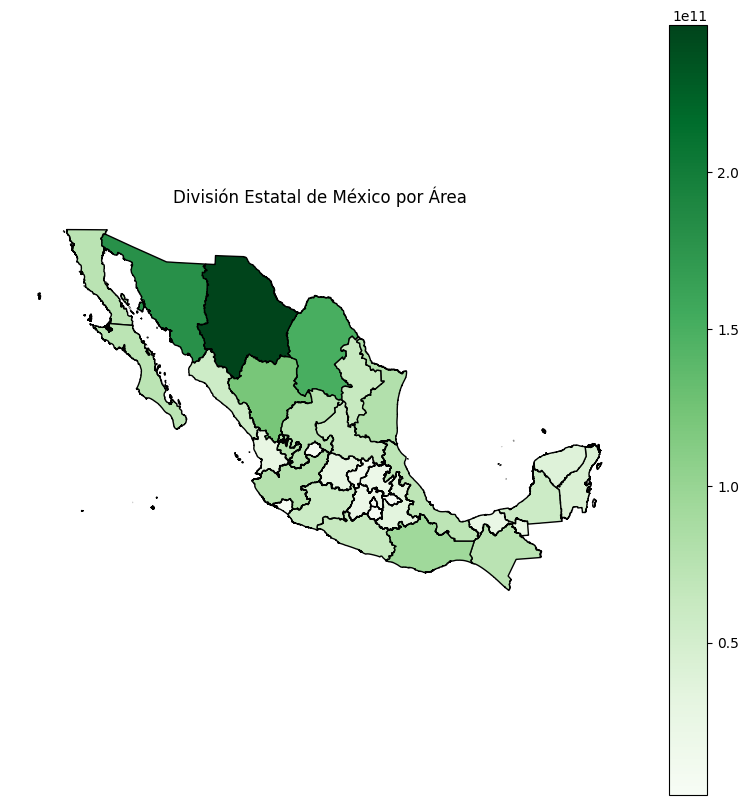

In [2]:
estados = gpd.read_file('Estados/conjunto_de_datos')
estados['area'] = estados['geometry'].area
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.plot(column='area', cmap='Greens', edgecolor='black', legend=True, ax=ax)
ax.set_title('División Estatal de México por Área')
ax.set_axis_off()
plt.show()

#### 2.
Crea un área de 5km alrededor de cada escuela. Calcula el área total cubierta y saca el porcentaje de área del país cubierta por escuelas.
Tip: cuidado con las intersecciones y las unidades!

In [3]:
escuelas = gpd.read_file('Escuelas/conjunto_de_datos')
escuelas = escuelas.to_crs(epsg=6372)
estados = estados.to_crs(epsg=6372)
escuelas['buffer'] = escuelas.geometry.buffer(5000)
union = escuelas['buffer'].unary_union
area = union.area
areaMexico = estados.geometry.unary_union.area
porcentaje = (area/areaMexico)*100
print('Las escuelas cubren un '+str(round(porcentaje,2))+'% del territorio.')

Las escuelas cubren un 16.16% del territorio.


#### 3.
Calcula la distancia entre la CDMX y todos los demás estados de la república. 
Bonus: punto extra si lo haces usando las fronteras y no los centroides.

In [4]:
cdmx = estados[estados['NOMGEO'] == 'Ciudad de México'].geometry.unary_union
distancias = estados[estados['NOMGEO'] != 'Ciudad de México'].apply(
    lambda row: cdmx.distance(row.geometry), axis=1)
estados['Distancia a CDMX'] = distancias
print(estados[['NOMGEO', 'Distancia a CDMX']]) 

                             NOMGEO  Distancia a CDMX
0                    Aguascalientes      3.795571e+05
1                   Baja California      1.645551e+06
2               Baja California Sur      1.127557e+06
3                          Campeche      6.829738e+05
4              Coahuila de Zaragoza      5.732362e+05
5                            Colima      4.319870e+05
6                           Chiapas      5.797345e+05
7                         Chihuahua      9.137590e+05
8                  Ciudad de México               NaN
9                           Durango      6.182677e+05
10                       Guanajuato      1.289515e+05
11                         Guerrero      5.011440e+04
12                          Hidalgo      2.854602e+04
13                          Jalisco      3.051710e+05
14                           México      0.000000e+00
15              Michoacán de Ocampo      8.819163e+04
16                          Morelos      0.000000e+00
17                          

#### 4.
Metete al INEGI y descarga el shapefile de nombre "Servicios profesionales, científicos y técnicos" de 2023 (más info en el READ ME y en la presentación). Grafica las escuelas (sólo las primarias, secundarias y prepas), y los servicios que se muestran en este shapefile (las escuelas de un color y los servicios de otro). También grafica los estados. Comenta si ves alguna relación entre la localización de estas escuelas y los servicios.

In [ ]:
servicios = gpd.read_file('Servicios/conjunto_de_datos')
servicios = servicios.to_crs(epsg=6372)
regex_primaria = r"(?i)(primaria|escuela básica|escuela elemental)"
regex_secundaria = r"(?i)(secundaria|escuela media|educación media)"
regex_prep_bach = r"(?i)(preparatoria|bachillerato|prepa|colegio)"
escuelas_filtradas = escuelas[
    escuelas['nombre_act'].str.contains(regex_primaria) |
    escuelas['nombre_act'].str.contains(regex_secundaria) |
    escuelas['nombre_act'].str.contains(regex_prep_bach)
]
fig, ax = plt.subplots(figsize=(10, 10))
estados.plot(ax=ax, color='lightgrey')
escuelas_filtradas.plot(ax=ax, color='blue', markersize=10, label='Escuelas')
servicios.plot(ax=ax, color='red', markersize=10, label='Servicios Profesionales')
ax.legend()
ax.set_title('Relación entre Escuelas y Servicios Profesionales en México')
plt.show()